In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
titanic = pd.read_csv("/content/gdrive/My Drive/titanic/train.csv", index_col=0)
titanic_t = pd.read_csv("/content/gdrive/My Drive/titanic/test.csv", index_col=0)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
def print_na(df):
  for col in df.columns:
    print(col, ': ', df[col].isna().sum())



def fill_age(df):
  df['Age'] = df['Age'].fillna(df['Age'].median())
  df['Age'] = df['Age'].astype("int64")
  return df



def delete_sib_parch(df):
  df = df.drop(columns = ['SibSp', 'Parch', 'Ticket'], axis = 1)
  return df



def get_cabin(df):
  df['Cabin'] = df['Cabin'].fillna('N')
  df['Cabin_L'] = [ i[0] for i in np.array(df['Cabin']) ]

  df['Cabin_number'] = [ i[1:].split(' ')[0] for i in np.array(df['Cabin']) ]
  df['Cabin_number'] = [ int(i) if str(i) != '' else 0 for i in np.array(df['Cabin_number'])]
  df = df.drop('Cabin', axis = 1)
  return df



def sex_to_bin(df):
  df['Sex'] = df['Sex'].apply(lambda row: 1 if row == 'male' else 0 if row == 'female' else -1)
  return df



"""def pick_int(a):
  a = a.split(' ')
  for i in a:
    if i[0].isdigit() == True:
      return i
  return a[0]

def get_ticket(df):
  df['Ticket_n'] = df['Ticket'].apply(lambda row: pick_int(row))
  df['Ticket_n'] = df['Ticket_n'].apply(lambda row: row if (row != 'LINE' or row != '2.') else 0)
  df['Ticket_n'] = df['Ticket_n'].astype(int)
  return df"""


def preprocess_all(df):
    df = fill_age(df)
    df = delete_sib_parch(df)
    df = get_cabin(df)
    df = sex_to_bin(df)
    
    return df


In [ ]:
print_na(titanic)

Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [ ]:
print_na(titanic_t)

Pclass :  0
Name :  0
Sex :  0
Age :  86
SibSp :  0
Parch :  0
Ticket :  0
Fare :  1
Cabin :  327
Embarked :  0


In [ ]:
titanic_t['Fare'] = titanic_t['Fare'].fillna(8)

titanic['Embarked'] = titanic['Embarked'].fillna('S')

#### analyse embarked

In [ ]:
titanic['Embarked'].unique()

all = {'S': 0, 'C': 0, 'Q': 0}

for i in range(1, titanic.shape[0]+1):
    all[titanic['Embarked'][i]] += 1

print(all)

{'S': 646, 'C': 168, 'Q': 77}


In [ ]:
alive = {'S': 0, 'C': 0, 'Q': 0}

for i in range(1, titanic.shape[0]+1):
    if titanic['Survived'][i] == 1:
      alive[titanic['Embarked'][i]] += 1

print(alive)

{'S': 219, 'C': 93, 'Q': 30}


In [ ]:
stat = []

for i in all.keys():
  print(i, alive[i]/all[i])

S 0.33900928792569657
C 0.5535714285714286
Q 0.38961038961038963


In [ ]:
corr = preprocess_all(titanic).corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,Fare,Cabin_number
Survived,1.000000,-0.338481,-0.543351,-0.064909,0.257307,0.235409
Pclass,-0.338481,1.000000,0.131900,-0.339999,-0.549500,-0.588947
Sex,-0.543351,0.131900,1.000000,0.080750,-0.182333,-0.095242
Age,-0.064909,-0.339999,0.080750,1.000000,0.096838,0.200806
Fare,0.257307,-0.549500,-0.182333,0.096838,1.000000,0.414760
Cabin_number,0.235409,-0.588947,-0.095242,0.200806,0.414760,1.000000


In [ ]:
#calculates mean between Cabin_number/Fare

def cabin_fare(df):
  a = [df['Cabin_number'][i] / df['Cabin_number'][i] for i in range(df.shape[0] + 1) if df['Cabin_number'][i] != 0]
  print(a)


In [ ]:
df['Age'].mean()

NameError: ignored

In [ ]:
preprocess_all(titanic)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_L,Cabin_number
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22,7.2500,S,N,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,71.2833,C,C,85
3,1,3,"Heikkinen, Miss. Laina",0,26,7.9250,S,N,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,53.1000,S,C,123
5,0,3,"Allen, Mr. William Henry",1,35,8.0500,S,N,0
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27,13.0000,S,N,0
888,1,1,"Graham, Miss. Margaret Edith",0,19,30.0000,S,B,42
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28,23.4500,S,N,0


In [ ]:
#nononono
"""Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (titanic['Age'] >= Q1 - 1.5 * IQR) & (titanic['Age'] <= Q3 + 1.5 *IQR)
titanic = titanic.loc[filter]"""

"Q1 = titanic['Age'].quantile(0.25)\nQ3 = titanic['Age'].quantile(0.75)\nIQR = Q3 - Q1    #IQR is interquartile range. \n\nfilter = (titanic['Age'] >= Q1 - 1.5 * IQR) & (titanic['Age'] <= Q3 + 1.5 *IQR)\ntitanic = titanic.loc[filter]"

In [ ]:
import plotly.express as px
df = titanic#['Age']
fig = px.histogram(df, x="Age", y="Survived", color="Survived",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [ ]:
mu, sigma = 29, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

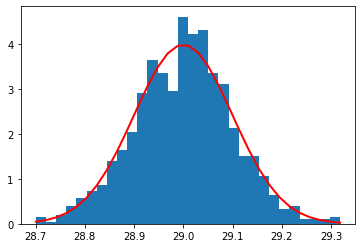

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## getdummies

In [ ]:
titanic = preprocess_all(titanic)
titanic_t = preprocess_all(titanic_t)

In [ ]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']
X = X.append(titanic_t)
X = X.drop('Name', axis = 1)

In [ ]:
X_n = X

In [ ]:
X_n

,Pclass,Sex,Age,Fare,Embarked,Cabin_L,Cabin_number
PassengerId,,,,,,,
1,3,1,22,7.2500,S,N,0
2,1,0,38,71.2833,C,C,85
3,3,0,26,7.9250,S,N,0
4,1,0,35,53.1000,S,C,123
5,3,1,35,8.0500,S,N,0
...,...,...,...,...,...,...,...
1305,3,1,27,8.0500,S,N,0
1306,1,0,39,108.9000,C,C,105
1307,3,1,38,7.2500,S,N,0


In [ ]:
for col in ['Embarked', 'Cabin_L']:
  a = pd.get_dummies(X[col])
  X_n = pd.concat([X_n, a], ignore_index=True, axis = 1)

X_n = X_n.drop(columns={4, 5})

X_n = pd.concat([X_n, y], ignore_index=True, axis = 1)

In [ ]:
X = X_n.loc[0:891]

In [ ]:
X_n = X_n.drop(columns={17})

In [ ]:
y = X[17]

## train test split

####выбросы нужно удалять в train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43, stratify = y)

X_train = pd.concat([X_train, y_train], ignore_index=True, axis = 1)

Q1 = X_train[2].quantile(0.25)
Q3 = X_train[2].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (X_train[2] >= Q1 - 1.5 * IQR) & (X_train[2] <= Q3 + 1.5 *IQR)
X_train = X_train.loc[filter]

y_train = X_train[17]
X_train = X_train.drop(columns={17})

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
def print_metrics(y_preds, y):
    #print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

# complete model testing

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_train), y_train)
print_metrics(lr.predict(X_test), y_test)

MSE: 4.196509897669558e-30
MSE: 5.33856151778889e-30


In [ ]:
rlr = Ridge(alpha=1)
rlr.fit(X_train, y_train)

print_metrics(rlr.predict(X_train), y_train)
print_metrics(rlr.predict(X_test), y_test)

MSE: 1.1939021459054328e-05
MSE: 1.3822392139174059e-05


In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.02, n_estimators=450, max_depth=4)
gbr.fit(X_train, y_train)

print_metrics(gbr.predict(X_train), y_train)
print_metrics(gbr.predict(X_test), y_test)

MSE: 9.654108234345575e-08
MSE: 9.742638663185344e-08


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print_metrics(rfr.predict(X_train), y_train)
print_metrics(rfr.predict(X_test), y_test)

MSE: 0.0
MSE: 0.0


In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18
PassengerId,,,,,,,,,,,,,,,,,,
611,3,0,39,31.275,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0
235,2,1,24,10.500,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0
212,2,0,35,21.000,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0
236,3,0,28,7.550,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0
467,2,1,28,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1,0,54,59.400,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
366,3,1,30,7.250,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0
858,1,1,51,26.550,17,0,0,1,0,0,0,0,1,0,0,0,0,1.0


In [ ]:
pip install catboost

     |████████████████████████████████| 66.2MB 49kB/s 


In [ ]:
preds_cat_1 = model.predict(X_n.loc[892:])

CatBoostError: ignored

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
PassengerId,,,,,,,,,,,,,,,,,
1,3,1,22,7.2500,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,0,38,71.2833,85,1,0,0,0,0,1,0,0,0,0,0,0
3,3,0,26,7.9250,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,35,53.1000,123,0,0,1,0,0,1,0,0,0,0,0,0
5,3,1,35,8.0500,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,1,27,13.0000,0,0,0,1,0,0,0,0,0,0,0,1,0
888,1,0,19,30.0000,42,0,0,1,0,1,0,0,0,0,0,0,0
889,3,0,28,23.4500,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
from catboost import CatBoostClassifier

y = titanic['Survived']

Stacked_train = pd.DataFrame()
Stacked_test = pd.DataFrame()

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X_n.loc[:891], y, test_size = 0.025, random_state=i, stratify = y)

  X_train = pd.concat([X_train, y_train], ignore_index=True, axis = 1)

  Q1 = X_train[2].quantile(0.25)
  Q3 = X_train[2].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 

  filter = (X_train[2] >= Q1 - 1.5 * IQR) & (X_train[2] <= Q3 + 1.5 *IQR)
  X_train = X_train.loc[filter]

  y_train = X_train[17]
  X_train = X_train.drop(columns={17})

  cat_features = [0, 1]
  train_data = X_train
  train_labels = y_train
  eval_data = X_test

  # Initialize CatBoostClassifier
  model = CatBoostClassifier(learning_rate=0.0015, # 004
                            depth=5, #5
                            l2_leaf_reg = 10, #5 7
                            task_type="GPU",
                            n_estimators=1100, #400
                            #logging_level='Silent'
                            )

  model.fit(train_data, train_labels)#, cat_features)

  preds_class = model.predict(eval_data)
  preds_class_all = model.predict(X)

  tr = pd.DataFrame([max(i) for i in model.predict_proba(X_n.loc[:891])])
  ts = pd.DataFrame([i[1] for i in model.predict_proba(X_n.loc[892:])])

  Stacked_train = pd.concat([Stacked_train, tr], ignore_index=True, axis = 1)
  Stacked_test = pd.concat([Stacked_test, ts], ignore_index=True, axis = 1)

  """print("on ", i, "test size", end=' ')
  print_metrics(preds_class, y_test)"""
  print("global:    ", end=' ')
  print_metrics(preds_class_all, y)
  print()
  

In [ ]:
Stacked_test

,0,1,2
0,0.284737,0.289082,0.286413
1,0.490623,0.488926,0.483358
2,0.319158,0.306975,0.318463
3,0.287068,0.293015,0.286536
4,0.492930,0.486763,0.489879
...,...,...,...
413,0.287068,0.292849,0.286365
414,0.789821,0.793137,0.786469
415,0.275196,0.282976,0.279172
416,0.287068,0.292849,0.286365


In [ ]:
ppp = Stacked_test.mean(axis= 1)
ppp

0      0.164304
1      0.500816
2      0.194596
3      0.176579
4      0.465383
         ...   
413    0.176156
414    0.919620
415    0.159365
416    0.176156
417    0.205020
Length: 418, dtype: float64

### keras model

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
"""
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
"""
X_k = Stacked_train.values.astype(float)
y = pd.Series(y).values

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(3, input_dim=3, activation='sigmoid'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# evaluate model with standardized dataset

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=16, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_k, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
preds = create_baseline().predict(Stacked_test)

In [ ]:
preds1 = preds.flatten()

In [ ]:
#!!!!
preds_cat_1 = model.predict(X_n.loc[892:])

In [ ]:
pred1 = np.array([1 if i > 0.7 else 0 for i in ppp])

In [ ]:
submission = pd.DataFrame({'PassengerId': [i + 892 for i in range(418)], 'Survived': pred1})
submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>